# **DATA UNDERSTANDING**

## **Penjelasan**

Sebuah perusahaan yang bergerak pada industri impor-ekspor makanan dan minuman yang tidak memproduksi barangnya sendiri melainkan menjualkan kembali produk dari produsen. Perusahaan tersebut ingin mengetahui keberhasilan karyawan dalam penjualan produk dari database tersebut. Sehingga perusahaan dapat memberikan treatment atau strategi kepada karyawan agar dapat meningkatkan penjualan produk kedepannya dari insight yang diperoleh.

## **Database Information**

Dalam Database Northwind ini terdapat 11 tabel yaitu:
- Categories               : Menyimpan informasi tentang data kategori produk yang dijual.
- Customers                : Menyimpan informasi tentang data pelanggan/customer.
- Employees                : Menyimpan semua informasi karyawan.
- EmployeeTerritories      : Menyimpan informasi zona wilayah karyawan.
- OrderDetails             : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Orders                   : Menyimpan informasi transaksi dan pengiriman produk yang dibeli oleh pelanggan.
- Products                 : Menyimpan informasi tentang jenis produk yang dijual.
- Region                   : Menyimpan informasi kode wilayah.
- shippers                 : Menyimpan informasi perusahaan pengirim.
- Suppliers                : Menyimpan informasi perusahaan pemasok.
- territories              : Menyimpan informasi deskripsi zona wilayah karyawan.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database `northwind`. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
#!pip install mysql-connector-python

sebelum menghubungkan sql ke python, kita menginstal sebuah modul mysql untuk Python.

In [5]:
import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import seaborn as sns
import matplotlib.pyplot as plt

Lakukan import library terlebih dahulu seperti library numpy as np. Penggunaan as disini, artinya kita menggantikan pemanggilan numpy dengan prefix np untuk proses berikutnya

In [6]:
#Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'nadya321997',
    database = 'northwind'
)

ini connectornya sqlcon, functionnya connect. Samakan host dan usernya yang kita pakai, masukakn password yang ada di sql. lalu tuliskan database yang akan dipakai. 

In [7]:
#function
mycursor = mydb.cursor()

def sql_df (myQuery) :
    mycursor.execute (myQuery)
    result = mycursor.fetchall()
    df1 = pd.DataFrame(result, columns=mycursor.column_names)
    return df1

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel. 

# **Data Detail**
Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```Employees```,```Costumer```, ```Orders```, ```OrderDetails```, dan ```Products```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

- employeeID dari tabel Orders
- orderdate dari tabel Orders
- productID dari tabel Orderdetails
- unitprice dari tabel Orderdetails
- quantity dari tabel Orderdetails
- categoryID dari tabel Products
- customerID dari tabel Customer
- lastName dari tabel employees
- fistName dari tabel employees
- Title dari tabel employees
- hiredate dari tabel employees
- salary dari tabel employees
- region dari tabel employees

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan total_pemasukan yang merupakan perkalian antara  unitprice(harga produk) dan quantity (banyaknya produk), terdapat kolom yang bernama quantity_produk yang merupakan jumlah produk yang dipesan, dan terdapat kolom yang bernama jumlah_pemesanan yang merupakan customer yang didapatkan dari jumlah pemesanan. Disini tabel-tabel tersebut digabungkan memakai left join agar menampilkan semua data berelasi maupun tidak berelasi.

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [8]:
df1 = sql_df (
    '''
    select o.employeeID, od.productID,pro.categoryID, cu.customerID, o.orderdate,emp.lastname, emp.firstname, emp.title, emp.hiredate, emp.region, emp.salary, 
     od.unitprice, od.quantity, (od.unitprice*od.quantity) as total_pemasukan,
    sum(od.quantity)over(partition by od.productID) as quantity_product, count(o.customerID)over(partition by o.customerID) as jumlah_pemesanan

from orders as o
left JOIN orderdetails as od ON o.orderID = od.orderID 
left JOIN employees as emp ON o.employeeID = emp.employeeID
left JOIN customers as cu ON o.customerID = cu.customerID
left JOIN products as pro ON od.productID = pro.productID;
    '''
)
df1


,employeeID,productID,categoryID,customerID,orderdate,lastname,firstname,title,hiredate,region,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan
0,4,76,1,ALFKI,1997-10-13,Peacock,Margaret,Sales Representative,1993-05-03,WA,1861.08,18.0000,15,270.0000,981,12
1,1,77,2,ALFKI,1998-01-15,Davolio,Nancy,Sales Representative,1992-05-01,WA,2954.55,13.0000,2,26.0000,791,12
2,4,3,2,ALFKI,1997-10-13,Peacock,Margaret,Sales Representative,1993-05-03,WA,1861.08,10.0000,6,60.0000,328,12
3,1,6,2,ALFKI,1998-03-16,Davolio,Nancy,Sales Representative,1992-05-01,WA,2954.55,25.0000,16,400.0000,301,12
4,6,28,7,ALFKI,1997-08-25,Suyama,Michael,Sales Representative,1993-10-17,None,2004.07,45.6000,15,684.0000,640,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,6,60,4,WOLZA,1997-07-25,Suyama,Michael,Sales Representative,1993-10-17,None,2004.07,34.0000,15,510.0000,1577,16
2151,4,61,2,WOLZA,1998-02-25,Peacock,Margaret,Sales Representative,1993-05-03,WA,1861.08,28.5000,15,427.5000,603,16
2152,8,61,2,WOLZA,1998-04-03,Callahan,Laura,Inside Sales Coordinator,1994-03-05,WA,2100.50,28.5000,7,199.5000,603,16
2153,4,62,3,WOLZA,1998-04-23,Peacock,Margaret,Sales Representative,1993-05-03,WA,1861.08,49.3000,12,591.6000,1083,16


## **Menampilkan minimal dan maximal gaji karyawan**

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini menunjukan data gaji karyawan yang paling kecil dan gaji karyawan yang paling besar menggunakan subquery dan aggregate function Min dan Max pada data salary.

In [9]:
df2= sql_df(
    '''
    select EmployeeID,LastName,FirstName,Title,BirthDate,HireDate, Salary,
(select max(Salary)from employees)as max_salary,(select min(Salary)from employees)as min_salary, (select sum(Salary)from employees)as jumlah_salary
from employees
order by salary desc
;
    '''
)
df2

,EmployeeID,LastName,FirstName,Title,BirthDate,HireDate,Salary,max_salary,min_salary,jumlah_salary
0,3,Leverling,Janet,Sales Representative,1963-08-30,1992-04-01,3119.15,3119.15,1744.21,20362.929932
1,1,Davolio,Nancy,Sales Representative,1948-12-08,1992-05-01,2954.55,3119.15,1744.21,20362.929932
2,9,Dodsworth,Anne,Sales Representative,1966-01-27,1994-11-15,2333.33,3119.15,1744.21,20362.929932
3,2,Fuller,Andrew,"Vice President, Sales",1952-02-19,1992-08-14,2254.49,3119.15,1744.21,20362.929932
4,8,Callahan,Laura,Inside Sales Coordinator,1958-01-09,1994-03-05,2100.50,3119.15,1744.21,20362.929932
5,6,Suyama,Michael,Sales Representative,1963-07-02,1993-10-17,2004.07,3119.15,1744.21,20362.929932
6,7,King,Robert,Sales Representative,1960-05-29,1994-01-02,1991.55,3119.15,1744.21,20362.929932
7,4,Peacock,Margaret,Sales Representative,1937-09-19,1993-05-03,1861.08,3119.15,1744.21,20362.929932
8,5,Buchanan,Steven,Sales Manager,1955-03-04,1993-10-17,1744.21,3119.15,1744.21,20362.929932


## **Menampilkan jumlah pemesanan dari customer **
Data yang ketiga ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini menunjukan jumlah customer yang order produk di perusahaan. Disini menggunakan *window function*, dengan window function kita dapat melakukan agregasi dengan tetap mempertahankan jumlah baris customerID karena kita memakai partition by customerID dan disini menggunakan over partition clause.

In [10]:
df3= sql_df(
    '''
select employeeID,customerID,
count(customerID)over(partition by customerID) as quantity_customer
from orders;
    '''
)
df3.head()

,employeeID,customerID,quantity_customer
0,6,ALFKI,6
1,4,ALFKI,6
2,4,ALFKI,6
3,1,ALFKI,6
4,1,ALFKI,6


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```df1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [11]:
# Check Info Tabel1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   employeeID        2155 non-null   int64         
 1   productID         2155 non-null   int64         
 2   categoryID        2155 non-null   int64         
 3   customerID        2155 non-null   object        
 4   orderdate         2155 non-null   datetime64[ns]
 5   lastname          2155 non-null   object        
 6   firstname         2155 non-null   object        
 7   title             2155 non-null   object        
 8   hiredate          2155 non-null   datetime64[ns]
 9   region            1587 non-null   object        
 10  salary            2155 non-null   float64       
 11  unitprice         2155 non-null   object        
 12  quantity          2155 non-null   int64         
 13  total_pemasukan   2155 non-null   object        
 14  quantity_product  2155 n

### **Melihat Data Sekilas Dari General Info**

 Terlihat di general info bahwa secara keseluruhan terdapat 2155 baris data dengan total 16 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, datetime64[ns] dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```region```. Features tersebut kehilangan lebih dari 26% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **langkah pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

Fokus berikutnya adalah perhatikan pada features berikut ini: 
1. unitprice
2. total_pemasukan 
3. quantity_product
4. employeeID 
5. productID
6. categoryID


Ada apa dengan tipe data tersebut? Mari kita cari tahu. Pada tipe data unitprice, total_pemasukan, dan quantity_product. Ketiga feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, ketiga feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan. Sedangkan pada tipe data employeeID, productID, categoryID ingin dirubah ke tipe data string agar memudahkan proses selanjutnya. Dari penjelasan tersebut, maka **langkah keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. 

In [12]:
df1.isnull().sum()

employeeID            0
productID             0
categoryID            0
customerID            0
orderdate             0
lastname              0
firstname             0
title                 0
hiredate              0
region              568
salary                0
unitprice             0
quantity              0
total_pemasukan       0
quantity_product      0
jumlah_pemesanan      0
dtype: int64

### **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah kolom *region*. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, beberapa data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

In [13]:
df1.drop(['region'], axis=1, inplace = True)

In [14]:
# Recheck Info

df1.isnull().sum()

employeeID          0
productID           0
categoryID          0
customerID          0
orderdate           0
lastname            0
firstname           0
title               0
hiredate            0
salary              0
unitprice           0
quantity            0
total_pemasukan     0
quantity_product    0
jumlah_pemesanan    0
dtype: int64

### **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```region``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

### **Mengubah Tipe Data Yang Salah**

Selanjutnya, setelah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Ketiga features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [15]:
# Change Spesific Column To numeric

df1['unitprice'] = pd.to_numeric(df1['unitprice'])
df1['total_pemasukan'] = pd.to_numeric(df1['total_pemasukan'])
df1['quantity_product'] = pd.to_numeric(df1['quantity_product'])


In [16]:
# Change Spesific Column To string
df1['employeeID']= df1['employeeID'].astype(str)
df1['productID']= df1['productID'].astype(str)
df1['categoryID']= df1['categoryID'].astype(str)

In [17]:
# Recheck Info

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   employeeID        2155 non-null   object        
 1   productID         2155 non-null   object        
 2   categoryID        2155 non-null   object        
 3   customerID        2155 non-null   object        
 4   orderdate         2155 non-null   datetime64[ns]
 5   lastname          2155 non-null   object        
 6   firstname         2155 non-null   object        
 7   title             2155 non-null   object        
 8   hiredate          2155 non-null   datetime64[ns]
 9   salary            2155 non-null   float64       
 10  unitprice         2155 non-null   float64       
 11  quantity          2155 non-null   int64         
 12  total_pemasukan   2155 non-null   float64       
 13  quantity_product  2155 non-null   float64       
 14  jumlah_pemesanan  2155 n

### **Recheck Data Information**

Bagian sebelumnya, 3 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. 

3 features yang awalnya bertipe data object sudah berubah menjadi float64. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi.

In [18]:
# Check Dupliacate
df1[df1.duplicated()]

,employeeID,productID,categoryID,customerID,orderdate,lastname,firstname,title,hiredate,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Data duplikat adalah ketika salinan dari observasi yang sama ada. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Data Outlier**

In [19]:
q3 = df1['total_pemasukan'].describe().loc['75%']
q1 = df1['total_pemasukan'].describe().loc['25%']

iqr=q3-q1

upper= q3 + 1.5*iqr
lower= q1 - 1.5*iqr

print('upper fence: ', upper)
print('lower fence: ', lower)

upper fence:  1574.625
lower fence:  -698.375


In [20]:
df1[(df1['total_pemasukan']<lower) | (df1['total_pemasukan']>upper)]

,employeeID,productID,categoryID,customerID,orderdate,lastname,firstname,title,hiredate,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan
42,9,20,3,AROUT,1998-03-16,Dodsworth,Anne,Sales Representative,1994-11-15,2333.33,81.0,50,4050.0,313.0,30
80,3,20,3,BERGS,1996-12-16,Leverling,Janet,Sales Representative,1992-04-01,3119.15,64.8,28,1814.4,313.0,52
92,9,38,1,BERGS,1997-09-17,Dodsworth,Anne,Sales Representative,1994-11-15,2333.33,263.5,15,3952.5,623.0,52
99,1,43,1,BERGS,1997-05-01,Davolio,Nancy,Sales Representative,1992-05-01,2954.55,46.0,60,2760.0,580.0,52
141,4,29,6,BLONP,1996-11-22,Peacock,Margaret,Sales Representative,1993-05-03,1861.08,99.0,35,3465.0,746.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,4,8,2,WHITC,1996-11-01,Peacock,Margaret,Sales Representative,1993-05-03,1861.08,32.0,70,2240.0,372.0,40
2093,4,17,6,WHITC,1998-01-30,Peacock,Margaret,Sales Representative,1993-05-03,1861.08,39.0,42,1638.0,978.0,40
2106,2,38,1,WHITC,1998-04-17,Fuller,Andrew,"Vice President, Sales",1992-08-14,2254.49,263.5,25,6587.5,623.0,40
2115,2,59,4,WHITC,1998-04-17,Fuller,Andrew,"Vice President, Sales",1992-08-14,2254.49,55.0,30,1650.0,1496.0,40


In [21]:
df1.describe()

,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,2335.321592,26.218520,23.812993,628.519067,810.066821,40.212065
std,491.333091,29.827418,19.022047,1036.466980,314.794766,29.296297
min,1744.210000,2.000000,1.000000,4.800000,95.000000,2.000000
25%,1991.550000,12.000000,10.000000,154.000000,601.000000,21.000000
50%,2100.500000,18.400000,20.000000,360.000000,791.000000,31.000000
75%,2954.550000,32.000000,30.000000,722.250000,1016.000000,45.000000
max,3119.150000,263.500000,130.000000,15810.000000,1577.000000,116.000000


### **check outliers**
Setelah melakukan proses outliers pada feature numerik seperti salary, unitprice, quantity, total_pemasukan, quantity_product, jumlah_pemesanan. Ditemukan semuanya memiliki outliers, outlier akan menyebab data tidak berdistribusi normal terhadap uji statistik karena sebaran data bisa menjadi condong ke kiri atau condong ke kanan. Outliers yang kita punya tidak akan dihapus untuk tidak mempengaruhi data yang sudah ada dan untuk membuktikan uji normalitas.

## **Feature 'Rentang tahun'**

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. Orderdate secara singkat dapat diartikan sebagai waktu pembelian atau kapan barang tersebut pesan oleh customer, sedangkat hiredate adalah waktu merekrut karyawan diperusahaan Northwind.

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni berapa lama waktu karyawan bekerja di perusahaan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pencarian tahun pemesanan terbaru di orderdate. Setelah menemukan tahun tersebut kemudian di kurang oleh waktu tahun yang ada di hiredate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa rentang tahun karyawan bekerja di perusahaan.

In [22]:
df5 = df1.set_index(['orderdate'])
df5[df5['employeeID']==7].loc['1998']


,employeeID,productID,categoryID,customerID,lastname,firstname,title,hiredate,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan
orderdate,,,,,,,,,,,,,,


proses yang dilakukan diatas yaitu untuk mencari tahun yang terbaru di orderdate. Pertama-tama, kolom orderdate dicari date yang tertinggi. Setelah memperoleh tahun 1998 itu yang tertinggi maka check dahulu dengan manual apakah 1998 ada di semua karyawan. Ternyata ada semua, sehingga bisa melanjutkan ke step berikutnya.

In [23]:
df1['rentangTahun']=1998-df1['hiredate'].dt.year
df1['rentangTahun']

0       5
1       6
2       5
3       6
4       5
       ..
2150    5
2151    5
2152    4
2153    5
2154    6
Name: rentangTahun, Length: 2155, dtype: int64

In [24]:
df1[['rentangTahun','employeeID']].groupby('employeeID').mean().reset_index()

,employeeID,rentangTahun
0,1,6.0
1,2,6.0
2,3,6.0
3,4,5.0
4,5,5.0
5,6,5.0
6,7,4.0
7,8,4.0
8,9,4.0


Setelah ketemu tahun 1998 yang paling tertinggi, maka dilakukan pengurangan dengan hiredate. Kemudian digrouby employeeID untuk mengetahui rentang tahun karyawan bekerja di perusahaan.

## **Unique Value 'Rentangtahun'**

Oke, setelah membuat sebuah kolom baru yang bernama Rentangtahun sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [25]:
# Check Data Anomalies in Date Time Fomrat

df1['rentangTahun'].value_counts()

6    907
5    705
4    543
Name: rentangTahun, dtype: int64

### **Anomali Pada rentang tahun**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, tidak terlihat ada anomali sehingga tidak perlu diproses apa-apa lagi.

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [26]:
# Check Some Info

listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, len(df1),df1[col].isna().sum(), round((df1[col].isna().sum()/len(df1[col])) * 100,2),
                    df1[col].nunique(), list(df1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,employeeID,object,2155,0,0.0,9,"[4, 5]"
1,productID,object,2155,0,0.0,77,"[29, 59]"
2,categoryID,object,2155,0,0.0,8,"[4, 2]"
3,customerID,object,2155,0,0.0,89,"[WHITC, KOENE]"
4,orderdate,datetime64[ns],2155,0,0.0,480,"[1996-11-27T00:00:00.000000000, 1997-11-07T00:..."
5,lastname,object,2155,0,0.0,9,"[Fuller, Leverling]"
6,firstname,object,2155,0,0.0,9,"[Robert, Margaret]"
7,title,object,2155,0,0.0,4,"[Sales Manager, Vice President, Sales]"
8,hiredate,datetime64[ns],2155,0,0.0,8,"[1993-05-03T00:00:00.000000000, 1992-04-01T00:..."
9,salary,float64,2155,0,0.0,9,"[2100.5, 2954.55]"


In [27]:

# Adding New Column With Lambda Function

df1['total_pemasukan'] = df1[['unitprice', 'quantity']].apply(lambda x:(x['unitprice'] * x['quantity']), axis = 1)
df1.head()

,employeeID,productID,categoryID,customerID,orderdate,lastname,firstname,title,hiredate,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan,rentangTahun
0,4,76,1,ALFKI,1997-10-13,Peacock,Margaret,Sales Representative,1993-05-03,1861.08,18.0,15,270.0,981.0,12,5
1,1,77,2,ALFKI,1998-01-15,Davolio,Nancy,Sales Representative,1992-05-01,2954.55,13.0,2,26.0,791.0,12,6
2,4,3,2,ALFKI,1997-10-13,Peacock,Margaret,Sales Representative,1993-05-03,1861.08,10.0,6,60.0,328.0,12,5
3,1,6,2,ALFKI,1998-03-16,Davolio,Nancy,Sales Representative,1992-05-01,2954.55,25.0,16,400.0,301.0,12,6
4,6,28,7,ALFKI,1997-08-25,Suyama,Michael,Sales Representative,1993-10-17,2004.07,45.6,15,684.0,640.0,12,5


Proses diatas yaitu membuat kolom baru yang berisi unitprice dan quantity dengan menggunakan lambda function.

# **DATA VISUALIZATION & STATISTICS**

## **Data Visualization**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk meningkatkan penjualan produk. kenapa menggunakan tools di python untuk data visualization? karena mudah pengaplikasiannya dan sesuai untuk keperluan bisnis.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Paling Banyak Menjual Produk berdasarkan Tahun**

In [60]:
df1['year']=df1['orderdate'].dt.year
waktu=df1.groupby('year').sum()[['total_pemasukan']].reset_index()
waktu

,year,total_pemasukan
0,1996,226298.50
1,1997,658388.75
2,1998,469771.34


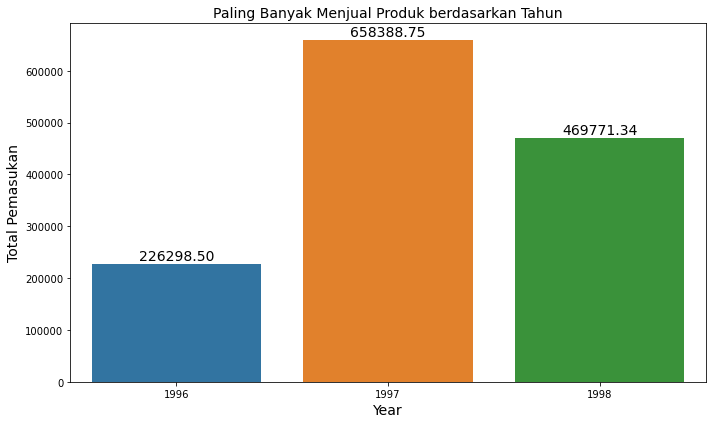

In [59]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="year", y="total_pemasukan", data=waktu,ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:
  
	ax.annotate(format(bar.get_height(), '.2f'),          
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
               ha='center',                               
               va='center',
               size=14, 
               xytext=(0, 8),                             
               textcoords='offset points')

plt.xlabel("Year", size=14)
plt.ylabel("Total Pemasukan", size=14)
plt.title("Paling Banyak Menjual Produk berdasarkan Tahun", size=14)
plt.tight_layout()
plt.show()

Berdasarkan barplot diatas, dimana kita dapat mengetahui bahwa tahun 1997 jumlah penjualan produk naik dan pada tahun 1996 jumlah penjualan terendah.

### **Pendapatan Penjualan Produk Tiap Karyawan**

In [29]:
pendapatan=df1.groupby('employeeID').sum()[['total_pemasukan']].reset_index()
pendapatan

,employeeID,total_pemasukan
0,1,202143.71
1,2,177749.26
2,3,213051.30
3,4,250187.45
4,5,75567.75
5,6,78198.10
6,7,141295.99
7,8,133301.03
8,9,82964.00


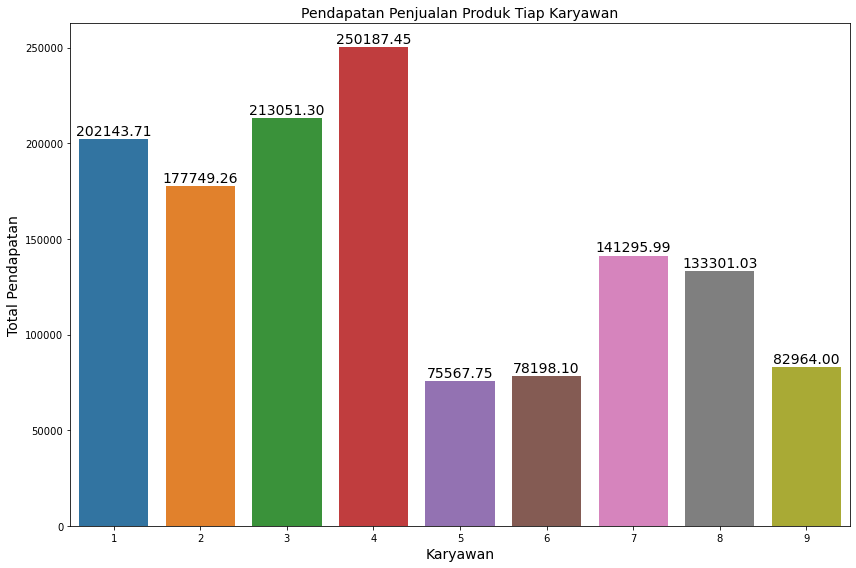

In [30]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(x="employeeID", y="total_pemasukan", data=pendapatan,ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:  
	ax.annotate(format(bar.get_height(), '.2f'),          
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
               ha='center',                               
               va='center',
               size=14, 
               xytext=(0, 8),                             
               textcoords='offset points')

plt.xlabel("Karyawan", size=14)
plt.ylabel("Total Pendapatan", size=14)
plt.title("Pendapatan Penjualan Produk Tiap Karyawan", size=14)
plt.tight_layout()
plt.show()

Pada barplot yang diatas. Insigth yang bisa didapatkan yaitu berdasarkan data visualization diatas. Diketahui bahwa karyawan dengan EmployeeID 4 merupakan karyawan dengan total pendapatan produk tertinggi sebesar 250187.45. Sedangkan karyawan dengan EmployeeID 5 merupakan karyawan dengan total pendapatan produk terendah sebesar 75567.75. Maka bisa dilihat karyawan mana saja yang pendapatan dari hasi penjualan produk terbanyak.

### **Jumlah Pesanan Customer Tiap Karyawan**

In [31]:
pesanan=df1.groupby('employeeID').count()[['jumlah_pemesanan']].reset_index()
pesanan

,employeeID,jumlah_pemesanan
0,1,345
1,2,241
2,3,321
3,4,420
4,5,117
5,6,168
6,7,176
7,8,260
8,9,107


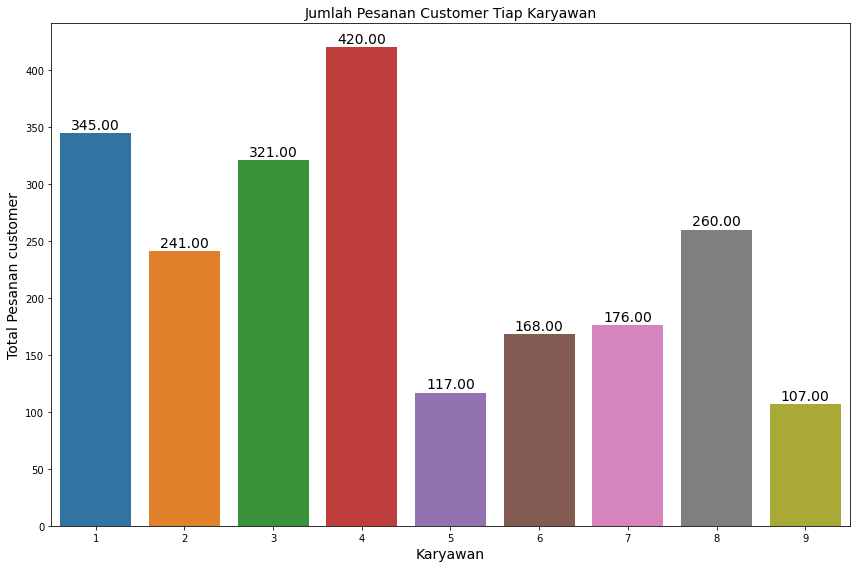

In [32]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(x="employeeID", y="jumlah_pemesanan", data=pesanan,ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:

    # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done   
	ax.annotate(format(bar.get_height(), '.2f'),          
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
               ha='center',                               
               va='center',
               size=14, 
               xytext=(0, 8),                             
               textcoords='offset points')

plt.xlabel("Karyawan", size=14)
plt.ylabel("Total Pesanan customer", size=14)
plt.title("Jumlah Pesanan Customer Tiap Karyawan", size=14)
plt.tight_layout()
plt.show()

Menggunakan visualization barplot memudahkan kita untuk membandingkan feature. Sehingga seperti yang terlihat diatas, kita dapat langsung mengetahui mana yang tertinggi dan mana yang terendah. Insigth yang bisa didapatkan yaitu berdasarkan data visualization diatas. Diketahui bahwa karyawan dengan EmployeeID 4 merupakan karyawan dengan total order atau pesanan tertinggi yang sebanyak 420. Sedangkan karyawan dengan EmployeeID 9 merupakan karyawan dengan total orderan atau pesanan produk terendah sebanyak 107. Maka bisa dilihat karyawan mana saja yang total order atau pemesanannya terbanyak.

### **Jumlah Penjualan Produk Tiap Karyawan**

In [33]:
produk=df1.groupby('employeeID').sum()[['quantity_product']].reset_index()
produk

,employeeID,quantity_product
0,1,287072.0
1,2,193927.0
2,3,254633.0
3,4,334336.0
4,5,101886.0
5,6,143280.0
6,7,135807.0
7,8,203474.0
8,9,91279.0


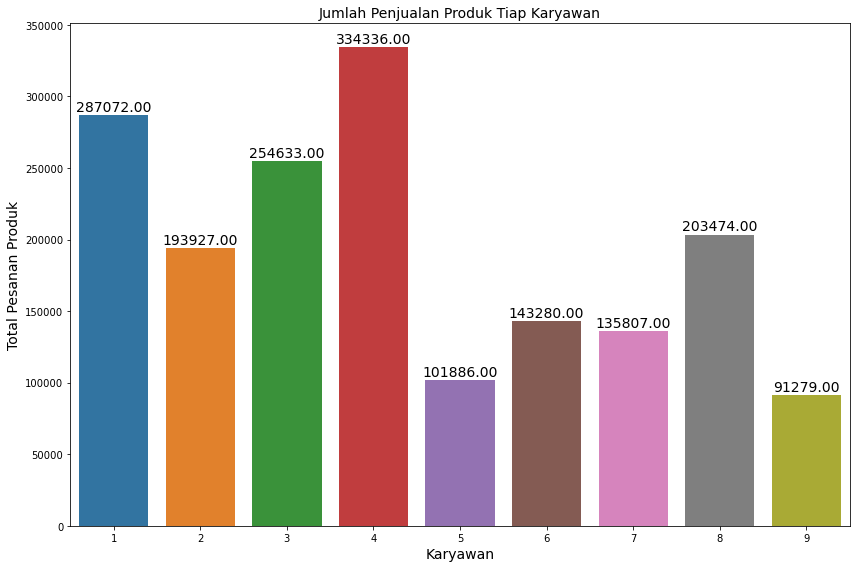

In [56]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(x="employeeID", y="quantity_product", data=produk,ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:

    # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done   
	ax.annotate(format(bar.get_height(), '.2f'),          
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
               ha='center',                               
               va='center',
               size=14, 
               xytext=(0, 8),                             
               textcoords='offset points')

plt.xlabel("Karyawan", size=14)
plt.ylabel("Total Pesanan Produk", size=14)
plt.title("Jumlah Penjualan Produk Tiap Karyawan", size=14)
plt.tight_layout()
plt.show()

Berdasarkan barplot diatas, dapat diketahui bahwa karyawan dengan penjualan produk terendah yaitu karyawan dengan EmployeeID 9 sebanyak 91279 order. Sedangan karyawan dengan penjualan produk terbanyak adalah karyawan dengan EmployeeID 4 sebanyak 334336.0. Maka bisa dilihat karyawan mana saja yang penjualan produk terbanyak.

### **Rata-rata gaji pada setiap departemen**

In [51]:
title=df1.groupby('title').mean()[['salary']].reset_index()
title

,title,salary
0,Inside Sales Coordinator,2100.50000
1,Sales Manager,1744.21000
2,Sales Representative,2432.71527
3,"Vice President, Sales",2254.49000


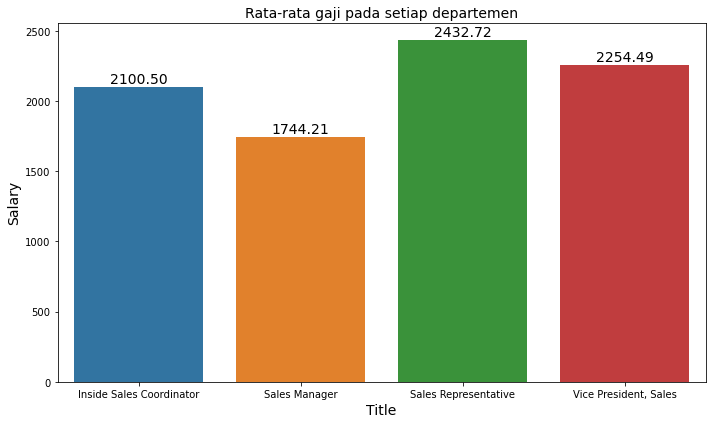

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="title", y="salary", data=title,ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:

    # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done   
	ax.annotate(format(bar.get_height(), '.2f'),          
               (bar.get_x() + bar.get_width()/2,         
                bar.get_height()),                        
               ha='center',                               
               va='center',
               size=14, 
               xytext=(0, 8),                            
               textcoords='offset points')

plt.xlabel("Title", size=14)
plt.ylabel("Salary", size=14)
plt.title("Rata-rata gaji pada setiap departemen", size=14)
plt.tight_layout()
plt.show()

Rata-rata gaji pada setiap departemen yang terbesar yaitu sales representative dan departemen terkecil yaitu sales manager. dikarenakan pada sales representative banyak karyawannya sedangkan sales manager hanya ada satu.

### **KESIMPULAN VISUALISATION**

Setelah melakukan visualisasi data, kita mendapatkan insight yang bisa membuat landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk meningkatkan penjualan produk kedepannya.
Pertama-tama kita visualisasi menggunakan barplot karena sangat sesuai dengan data yang kita miliki yaitu membandingkan 2 nilai. Kalau mencoba menggunakan histogram, lineplot, scatterplot tidak sesuai karena fungsi dari tiap visualisasi berbeda. Contohnya lineplot cocok untuk menampilkan progress dari rentang waktu tertentu, kalau histogram untuk menampilkan distribusi data berupa frequensi. 

Kedua setelah melihat visualisasi kita dapat mengetahui penjualan terbesar itu pada tahun 1997 dan tahun berikutnya menurun. jadi kita bisa pelajari pada tahun 1997 dan tahun 1998 menggunakan strategi apa dan menerapkannya ke tahun berikutnya.

Ketiga pada visualisasi pendapatan penjualan produk tiap karyawan kita bisa mengetahui employeeID 5 merupakan karyawan dengan pendapatan hasil penjualan produk terendah, tetapi kita bisa lihat di visualisasi pesanan dan jumlah penjualan produk karyawan tersebut bukan karyawan yang memperoleh hasil terendah. Hal tersebut dapat dipengaruhi harga produk yang dijual oleh karyawan employeeID 5 lebih rendah dibandingkan harga produk yang dijual oleh karyawan lain. Sedangkan karyawan EmployeeID 9 adalah karyawan dengan pesanan dan jumlah penjualan produk terendah dibandingkan karyawan lain. Namun, karyawan EmployeeID 9 bukan karyawan yang memperoleh pendapatan penjualan terendah, karena dipengaruhi oleh harga produk yang dijual lebih mahal dibandingkan harga produk yang dijual oleh EmployeeID 5 dan juga dipengaruhi oleh kurangnya pelanggan yang dilayani oleh EmployeeID 9.

Kemudian hasil tersebut kita dapat melihat karyawan dengan EmployeeID 5 dan EmployeeID 9 perlu dilakukan perlakuan khusus atau pelatihan untuk meningkatkan produktivitas penjualannya. 
keempat pada visualisasi rata-rata gaji pada setiap departemen sudah benar yang tertinggi adalah sales representative karena karyawan departemen itu lah yang banyak mengahasilkan pendapatan penjualan dan didalam departemen tersebut karyawannya banyak. 

### **STATISTIK**

In [ ]:
# Uji Perbandingan Nilai total_pemasukan Antar Setiap emplyeeID (Normalitas)

from scipy.stats import shapiro

sw_stat, sw_pval = shapiro(df1['total_pemasukan'])

if sw_pval > 0.05:
    print(f'pvalue:{sw_pval}, kita asumsikan datanya terdistribusi normal')
else:
    print(f'pvalue:{sw_pval}, kita TIDAK asumsikan datanya terdistribusi normal')

pvalue:0.0, kita TIDAK asumsikan datanya terdistribusi normal


Pada Uji normalitas karyawan dengan total penjualan produk menggunakan uji statistik Shapiro Wilk. Kenapa memilih uji statistik shapiro wilk karena banyak dinilai sebagai uji paling kuat untuk menguji distribusi normal. jika data berdistribusi normal dapat diasumsikan bahwa data diambil secara acak dari populasi normal. Setelah melakukan uji statistik menggunakan Shapiro wilk mendapatkan hasil bahwa karyawan dengan total penjualan produk itu datanya TIDAK terterdistribusi normal. Penyebab data tidak berdistribusi normal adalah adanya data pencilan yang biasa disebut dengan outlier. Dengan adanya outlier tersebut, maka sebaran data bisa menjadi condong ke kiri atau condong ke kanan.

In [ ]:
# Uji Perbandingan Nilai total penjualan produk Antar Setiap emplyeeID (Kruskal Wallis)

from scipy.stats import kruskal

stat, pvalue = kruskal(
    df1[df1['employeeID'] == '1']['total_pemasukan'],
    df1[df1['employeeID'] == '2']['total_pemasukan'],
    df1[df1['employeeID'] == '3']['total_pemasukan'],
    df1[df1['employeeID'] == '4']['total_pemasukan'],
    df1[df1['employeeID'] == '5']['total_pemasukan'],
    df1[df1['employeeID'] == '6']['total_pemasukan'],
    df1[df1['employeeID'] == '7']['total_pemasukan'],
    df1[df1['employeeID'] == '8']['total_pemasukan'],
    df1[df1['employeeID'] == '9']['total_pemasukan']
) 
pvalue
if pvalue > 0.05:
    print (f'Gagal Tolak H0 Karena P-Value ({pvalue} > 0.05)')
    print (' Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Tidak Terdapat Perbedaan Nilai Median total penjualan pada Setiap karyawan Yang Ada')
else:
    print (f'Tolak H0 Karena P-Value ({pvalue} < 0.05)')
    print ('Artinya kita punya cukup bukti secara statistik bahwa terdapat Perbedaan Nilai Median total penjualan pada Setiap karyawan Yang Ada')


Gagal Tolak H0 Karena P-Value (0.23095581086874475 > 0.05)
 Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Tidak Terdapat Perbedaan Nilai Median total penjualan pada Setiap karyawan Yang Ada


Pada studi kasus ini kita membandingkan nilai median jumlah penjualan produk antar karyawan. Kita uji data tersebut menggunakan hypothesis testing Kruskal Wallis apakah ada perbedaan atau tidak. Kenapa menggunakan hypothesis testing Kruskal Wallis? karena kita memperoleh data jumlah penjualan produk antar karyawan tidak berdistribusi normal. Sehingga menggunakan tes Kruskal Wallis untuk menguji perbandingan lebih dari 2 sampel independent dalam statistik non-parametrik.
Setelah menguji data menggunakan hypoyhesis test Kruskal Wallis. Hasil yang didapatkan yaitu Gagal tolak H0 karena pvalue lebih besar dari 0.05. Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Tidak Terdapat Perbedaan Nilai Median total penjualan pada Setiap karyawan yang Ada.

## **Hubungan jumlah pemesanan dan unitprice**

In [ ]:
corr_matrix = df1.corr()
corr_matrix

,salary,unitprice,quantity,total_pemasukan,quantity_product,jumlah_pemesanan,rentangTahun,year
salary,1.000000,0.013063,-0.005002,0.007784,0.002353,0.033483,0.667908,0.044276
unitprice,0.013063,1.000000,0.007366,0.699813,-0.040516,-0.002408,0.009960,0.057006
quantity,-0.005002,0.007366,1.000000,0.488716,0.067358,0.461508,-0.005652,-0.005033
total_pemasukan,0.007784,0.699813,0.488716,1.000000,0.008741,0.216563,0.003683,0.040721
quantity_product,0.002353,-0.040516,0.067358,0.008741,1.000000,0.031183,0.018750,-0.017123
jumlah_pemesanan,0.033483,-0.002408,0.461508,0.216563,0.031183,1.000000,0.004990,0.009844
rentangTahun,0.667908,0.009960,-0.005652,0.003683,0.018750,0.004990,1.000000,0.006346
year,0.044276,0.057006,-0.005033,0.040721,-0.017123,0.009844,0.006346,1.000000


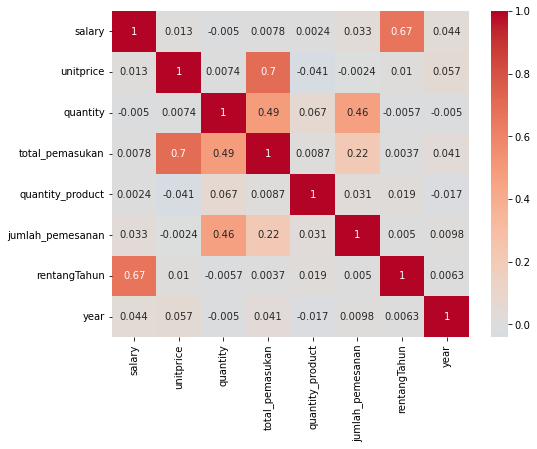

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', annot=True)

plt.show()

In [ ]:


for i in df1['employeeID'].unique():
    print(f"{df1[df1['employeeID'] == i]['unitprice'].corr(df1[df1['employeeID']==i]['total_pemasukan'], method= 'spearman')} : {i}")

0.6428934969659686 : 4
0.5628591522206278 : 1
0.5970472456235911 : 6
0.6667971669432632 : 3
0.644708293279598 : 7
0.6603347426153638 : 8
0.6820977297837529 : 9
0.6545201764010413 : 5
0.6615207343698197 : 2


In [ ]:
corr = []
for i in df1['employeeID'].unique():
    corr.append(df1[df1['employeeID'] == i]['unitprice'].corr(df1[df1['employeeID']==i]['total_pemasukan'], method= 'spearman'))
    
pd.DataFrame(data = corr, index = df1['employeeID'].unique(), columns = ['Correlation total_pemasukan vs unitprice']).sort_values('Correlation total_pemasukan vs unitprice', ascending=True)

,Correlation total_pemasukan vs unitprice
1,0.562859
6,0.597047
4,0.642893
7,0.644708
5,0.654520
8,0.660335
2,0.661521
3,0.666797
9,0.682098


In [62]:
df1.groupby('employeeID')['unitprice'].corr(df1['total_pemasukan']).sort_values(ascending=False)

employeeID
7    0.855225
5    0.809358
1    0.707696
4    0.702893
3    0.701069
2    0.686126
9    0.679167
6    0.670168
8    0.604180
Name: unitprice, dtype: float64

Dari heatmapp yang ditampilkan diatas, tidak saling berhubungan dan sangat lemah. Hubungan yang paling kuat dari yang lain yaitu bisa dilihat di feature unitprice dan total pemasukan karena angka correlasi semakin mendekat 1 itu artinya hubungan semakin kuat, sedangkan mendekati 0 semakin lemah. Dan kita bisa melihat dari warnanya yaitu makin pekat warnanya artinya makin kuat Kenapa memilih memakai correlation method Spearman karena feature unitprice dan total pemasukan itu tidak terdistribusi normal. Dan employeeID yang paling tidak berkorelasi atau korelasinya paling lemah di dua variabel di atas adalah **employeeID 8** (0.604180).
employeeID yang paling berkorelasi di dua variabel di atas adalah **employeeID 7** (0.855225).